<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Nisha_2211566_MLOPS_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop disease detection

## if you are using gcp, tensor flow enabled notebook needs to be selected

In [ ]:
import tensorflow as tf
from IPython.display import Image, display

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
!wget https://storage.googleapis.com/ibeans/train.zip

!wget https://storage.googleapis.com/ibeans/validation.zip

!wget https://storage.googleapis.com/ibeans/test.zip

--2022-12-20 08:53:37--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 137.15M  43.8MB/s    in 3.3s    

2022-12-20 08:53:41 (41.7 MB/s) - ‘train.zip’ saved [143812152/143812152]

--2022-12-20 08:53:41--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip’

validation.zip      100%[===================

In [ ]:
!mkdir beans # MAking a directory

In [ ]:
!unzip train.zip -d beans/
!unzip test.zip -d beans/
!unzip validation.zip -d beans/

Archive:  train.zip
   creating: beans/train/
   creating: beans/train/healthy/
   creating: beans/train/angular_leaf_spot/
   creating: beans/train/bean_rust/
  inflating: beans/train/healthy/healthy_train.265.jpg  
  inflating: beans/train/healthy/healthy_train.271.jpg  
  inflating: beans/train/healthy/healthy_train.259.jpg  
  inflating: beans/train/healthy/healthy_train.99.jpg  
  inflating: beans/train/healthy/healthy_train.311.jpg  
  inflating: beans/train/healthy/healthy_train.66.jpg  
  inflating: beans/train/healthy/healthy_train.72.jpg  
  inflating: beans/train/healthy/healthy_train.305.jpg  
  inflating: beans/train/healthy/healthy_train.339.jpg  
  inflating: beans/train/healthy/healthy_train.113.jpg  
  inflating: beans/train/healthy/healthy_train.107.jpg  
  inflating: beans/train/healthy/healthy_train.106.jpg  
  inflating: beans/train/healthy/healthy_train.112.jpg  
  inflating: beans/train/healthy/healthy_train.338.jpg  
  inflating: beans/train/healthy/healthy_trai

In [ ]:
!find beans -type f | wc -l

1296


In [ ]:
!find beans/train -type f | wc -l

1035


In [ ]:
!find beans/test -type f | wc -l

128


In [ ]:
!find beans/validation -type f | wc -l

133


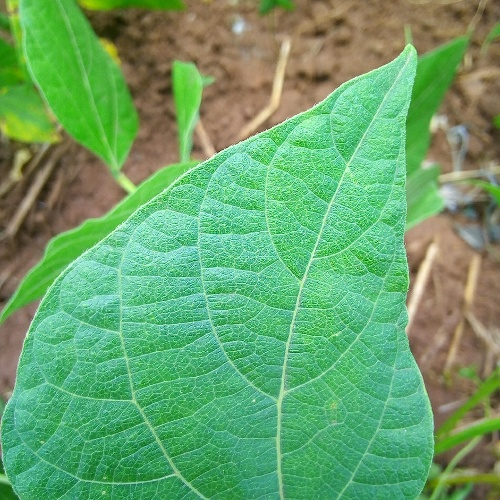

In [ ]:
display(Image('beans/train/healthy/healthy_train.0.jpg'))

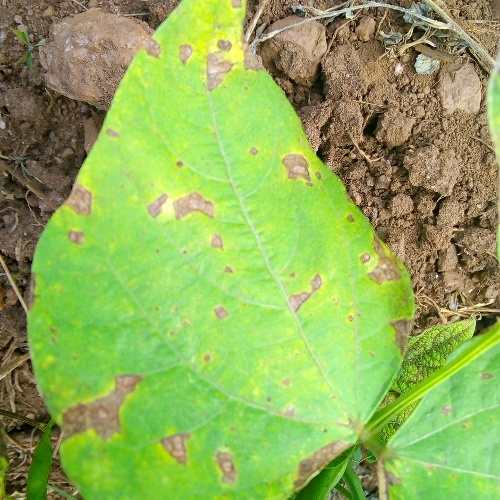

In [ ]:
display(Image('beans/train/angular_leaf_spot/angular_leaf_spot_train.124.jpg'))

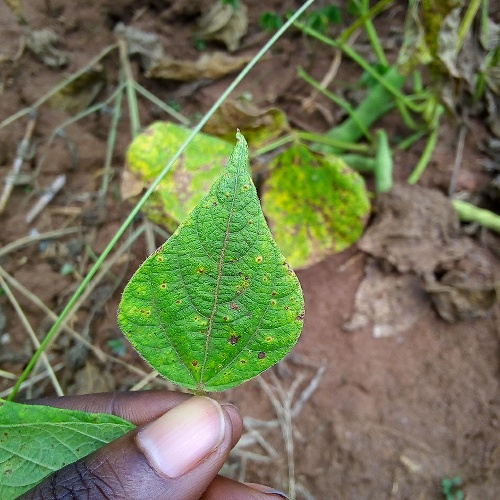

In [ ]:
display(Image('beans/train/bean_rust/bean_rust_train.162.jpg'))

In [ ]:
batch_size = 128
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/train',

  seed=111,

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 1034 files belonging to 3 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/test',

  seed=111,

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 128 files belonging to 3 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/validation',

  seed=111,

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 133 files belonging to 3 classes.


In [ ]:
for image_batch, labels_batch in train_ds:

  print(image_batch.shape)

  print(labels_batch.shape)

  break

(128, 224, 224, 3)
(128,)


In [ ]:
classes = train_ds.class_names
print(classes)

['angular_leaf_spot', 'bean_rust', 'healthy']


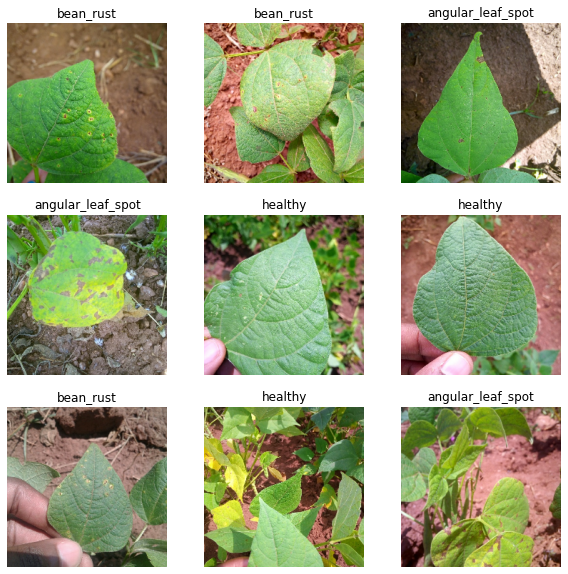

In [ ]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):

  for i in range(9):

    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(images[i].numpy().astype("uint8"))

    plt.title(classes[labels[i]])

    plt.axis("off")

In [ ]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

What is AUTOTUNE? WHat are the afvantage of using this?

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE



train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

What TFHUB?

TensorFlow Hub is an open repository and library for reusable machine learning. The tfhub. dev repository provides many pre-trained models: text embeddings, image classification models, TF. js/TFLite models and much more. The repository is open to community contributors

In [ ]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape=(img_height,img_width,3))

In [ ]:
feature_extractor_layer.trainable = False

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
tf.random.set_seed(121)

In [ ]:
# Steps to be done
# building keras model
# compile the model 
# fit the model
# Evaluating
# Predicting

In [ ]:
model = tf.keras.Sequential([
    normalization_layer,
    feature_extractor_layer,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3,activation = 'softmax')
])

Compile defines the loss function, the optimizer and the metrics. That's all. It has nothing to do with the weights and you can compile a model as many times as you want without causing any problem to pretrained weights.

In [ ]:
model.compile(loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs = 10,validation_data = val_ds)

Epoch 1/10
9/9 [==============================] - 45s 4s/step - loss: 1.3505 - accuracy: 0.3810 - val_loss: 0.8992 - val_accuracy: 0.5789
Epoch 2/10
9/9 [==============================] - 30s 3s/step - loss: 0.8921 - accuracy: 0.5899 - val_loss: 0.6716 - val_accuracy: 0.7368
Epoch 3/10
9/9 [==============================] - 31s 3s/step - loss: 0.6711 - accuracy: 0.7234 - val_loss: 0.5738 - val_accuracy: 0.7895
Epoch 4/10
9/9 [==============================] - 30s 3s/step - loss: 0.5936 - accuracy: 0.7495 - val_loss: 0.5055 - val_accuracy: 0.8045
Epoch 5/10
9/9 [==============================] - 30s 3s/step - loss: 0.5241 - accuracy: 0.7795 - val_loss: 0.4628 - val_accuracy: 0.8195
Epoch 6/10
9/9 [==============================] - 31s 3s/step - loss: 0.4885 - accuracy: 0.8037 - val_loss: 0.4297 - val_accuracy: 0.8271
Epoch 7/10
9/9 [==============================] - 30s 3s/step - loss: 0.4348 - accuracy: 0.8288 - val_loss: 0.4030 - val_accuracy: 0.8271
Epoch 8/10
9/9 [==================

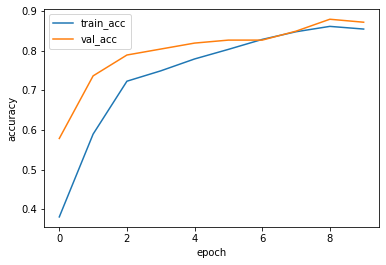

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'])
plt.show()

1/1 [==============================] - 0s 61ms/step


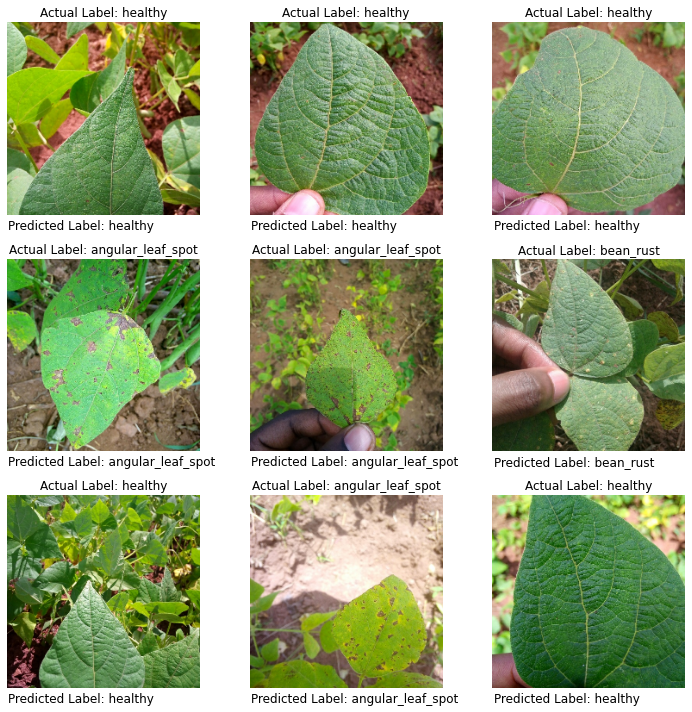

In [ ]:
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):

  for i in range(9):

    ax = plt.subplot(3, 3, i + 1)



    plt.tight_layout()

    

    img = tf.keras.preprocessing.image.img_to_array(images[i])                    

    img = np.expand_dims(img, axis=0)  



    pred=model.predict(img)

    plt.imshow(images[i].numpy().astype("uint8"))

    plt.title("Actual Label: %s" % classes[labels[i]])

    plt.text(1, 240, "Predicted Label: %s" % classes[np.argmax(pred)], fontsize=12)



    plt.axis("off")

The summary is textual and includes information about: The layers and their order in the model. The output shape of each layer. The number of parameters (weights) in each layer. The total number of parameters (weights) in the mode

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.save('./models',save_format = 'tf')

In [ ]:
!ls -alrt models

total 1888
drwxr-xr-x 1 root root    4096 Dec 20 09:12 ..
drwxr-xr-x 2 root root    4096 Dec 20 09:12 variables
drwxr-xr-x 2 root root    4096 Dec 20 09:12 assets
-rw-r--r-- 1 root root 1906370 Dec 20 09:12 saved_model.pb
-rw-r--r-- 1 root root    6922 Dec 20 09:12 keras_metadata.pb
drwxr-xr-x 4 root root    4096 Dec 20 09:12 .


In [ ]:
model_loaded = tf.keras.models.load_model('./models/')

In [ ]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


skimage.transform.warp (image, inverse_map[, … ]) Warp an image according to a given coordinate transformation. skimage.transform.warp_coords (coord_map, shape) Build the source coordinates for the output of a 2-D image warp.

In [ ]:
from PIL import Image

import numpy as np

from skimage import transform

def process(filename):

   np_image = Image.open(filename)

   np_image = np.array(np_image).astype('float32')

   np_image = transform.resize(np_image, (224, 224, 3))

   np_image = np.expand_dims(np_image, axis=0)

   return np_image

In [ ]:
pred_label = model_loaded.predict(process('beans/train/healthy/healthy_train.0.jpg'))

1/1 [==============================] - 1s 1s/step


In [ ]:
pred_label

array([[0.00330928, 0.03737312, 0.9593176 ]], dtype=float32)

In [ ]:
!zip -r models.zip models/

  adding: models/ (stored 0%)
  adding: models/keras_metadata.pb (deflated 82%)
  adding: models/saved_model.pb (deflated 92%)
  adding: models/variables/ (stored 0%)
  adding: models/variables/variables.index (deflated 78%)
  adding: models/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: models/assets/ (stored 0%)
